<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




#  Create your AI avatar with PuLID

PuLID enables fast and high-quality identity customization. The system quickly learns the defining features of a face from your photos and accurately transfers these characteristics to new AI-generated images. This process creates unique visuals in just a few seconds, ensuring the original photos' consistency is maintained.

![illustration](https://raw.githubusercontent.com/Ikomia-hub/infer_pulid/main/images/output_1.jpg)

## Setup

Please use a GPU for this tutorial.

**Note: PuLID requires 19Gb VRAM to run**.

In the menu, select "Runtime" then "Change runtime type", choose GPU in "Hardware accelerator".

Check your GPU with the following command:

In [ ]:
!nvidia-smi

You need to install Ikomia Python API with pip


In [ ]:
!pip install ikomia

---

**-Google Colab ONLY- Restart runtime**

Click on the "RESTART RUNTIME" button at the end the previous window.

---

## Run PuLID

### Using one image as input

In [ ]:
from ikomia.dataprocess.workflow import Workflow

# Init your workflow
wf = Workflow()

# Add the PuLID algorithm
# Add algorithm
pulid = wf.add_task(name="infer_pulid", auto_connect=True)

# Set parameters
pulid.set_parameters({
    'prompt': 'portrait, color, cinematic, in garden, soft light, detailed face, wonderwoman costum, golden boomerang tiara, short hair',
    'guidance_scale': '1.2',
    'guidance_scale_id': '0.8',
    'num_inference_steps': '4',
    'seed': '-1',
    'width': '1024',
    'height': '1024',
    'mode': 'fidelity',
    'num_images_per_prompt':'1',
    'mix_id' : 'False'
    })

# Run on your image  
wf.run_on(url="https://images.pexels.com/photos/4927360/pexels-photo-4927360.jpeg?cs=srgb&dl=pexels-anntarazevich-4927360.jpg&fm=jpg&w=1280&h=1920")

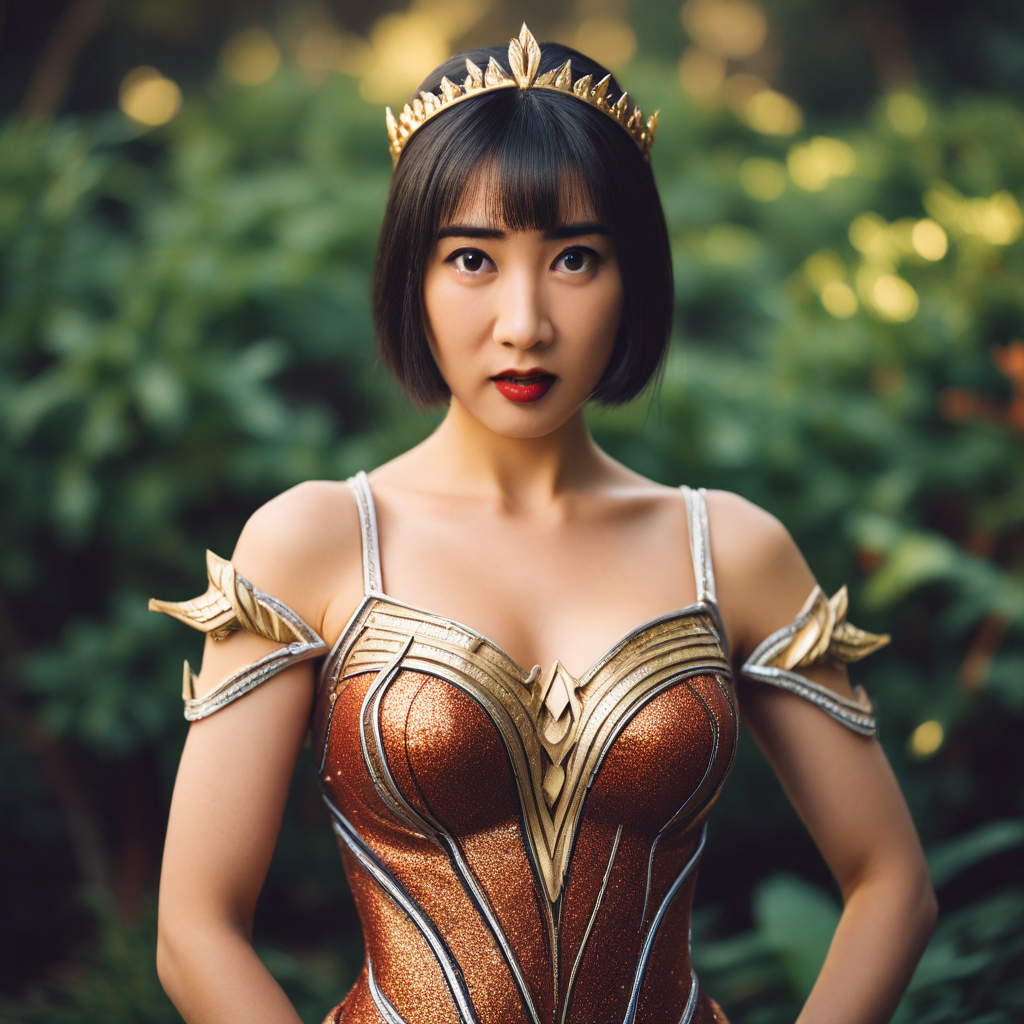

In [6]:
from ikomia.utils.displayIO import display

from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Display the image
display(pulid.get_output(0).get_image())

### Using several images as input

In [ ]:
from ikomia.dataprocess.workflow import Workflow

# Init your workflow
wf = Workflow()

# Set main image
wf.set_image_input(
    url="https://images.pexels.com/photos/4927360/pexels-photo-4927360.jpeg?cs=srgb&dl=pexels-anntarazevich-4927360.jpg&fm=jpg&w=1280&h=1920",
    index=0
)

# Set additional image(s) [optional]
wf.set_image_input(
    url="https://images.pexels.com/photos/4927361/pexels-photo-4927361.jpeg?cs=srgb&dl=pexels-anntarazevich-4927361.jpg&fm=jpg&w=1280&h=1920",
    index=1
)

wf.set_image_input(
    url="https://images.pexels.com/photos/4927359/pexels-photo-4927359.jpeg?cs=srgb&dl=pexels-anntarazevich-4927359.jpg&fm=jpg&w=1280&h=1920",
    index=2
)

wf.set_image_input(
    url="https://images.pexels.com/photos/4927358/pexels-photo-4927358.jpeg?cs=srgb&dl=pexels-anntarazevich-4927358.jpg&fm=jpg&w=1280&h=1920",
    index=3
)

# Add algorithm
pulid = wf.add_task(name="infer_pulid", auto_connect=False)

# Connect inputs
wf.connect_tasks(wf.root(), pulid, [(0,0), (1,1), (2,2), (3,3)])

# Set parameters
pulid.set_parameters({
    'prompt': 'portrait, impressionist painting, loose brushwork, vibrant color, light and shadow play',
    'guidance_scale': '1.2',
    'guidance_scale_id': '0.8',
    'num_inference_steps': '4',
    'seed': '-1',
    'width': '1024',
    'height': '1024',
    'mode': 'fidelity',
    'num_images_per_prompt':'2',
    'mix_id' : 'False'
    })

# Run your workflow
wf.run()

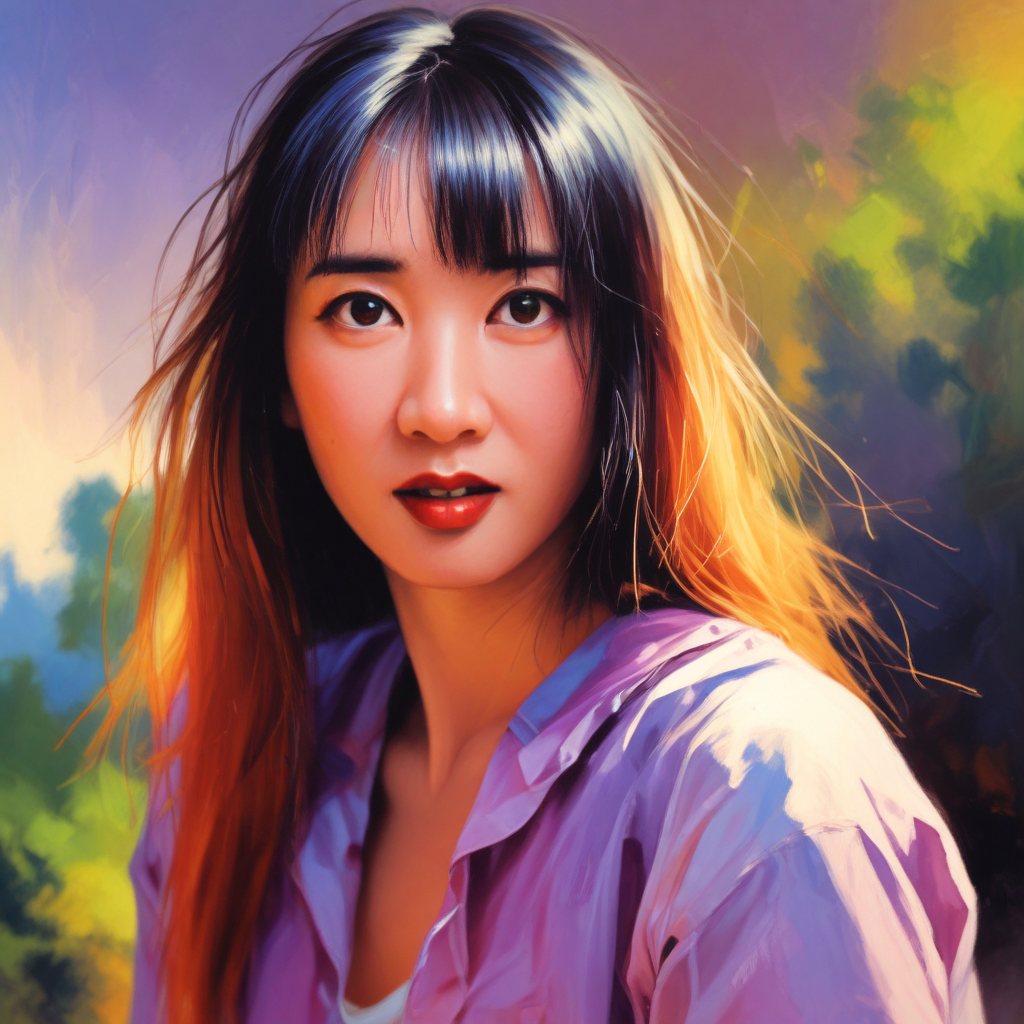

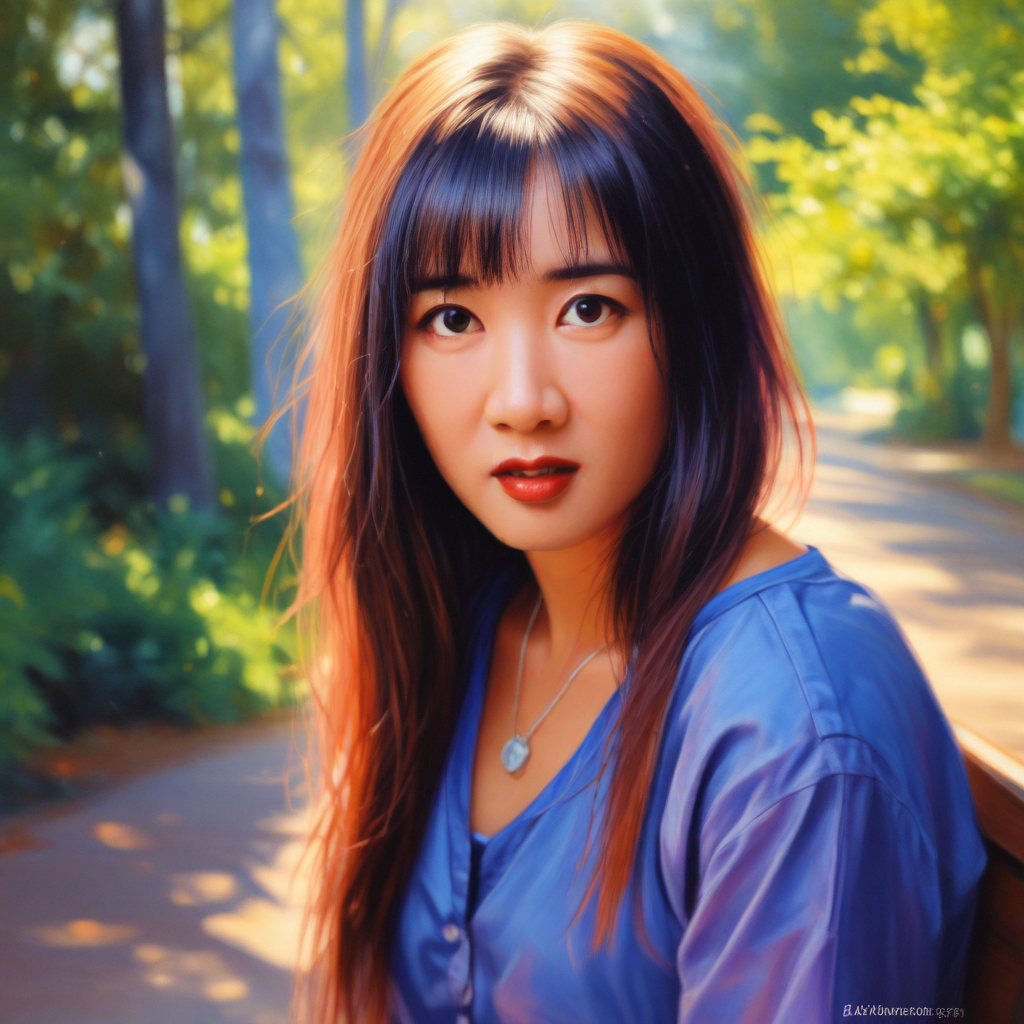

In [8]:
from ikomia.utils.displayIO import display

from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Display the image
# Inpect your result
display(pulid.get_output(0).get_image())
display(pulid.get_output(1).get_image())

## List of parameters

- **prompt** (str): Text prompt to guide the image generation.
- **negative_prompt** (str, *optional*) - default 'flaws in the eyes, flaws in the face, flaws, lowres, non-HDRi, low quality, worst quality,' \
            'artifacts noise, text, watermark, glitch, deformed, mutated, ugly, disfigured, hands, ' \
            'low resolution, partially rendered objects,  deformed or partially rendered eyes, ' \
            'deformed, deformed eyeballs, cross-eyed, blurry'.
The prompt not to guide the image generation. Ignored when not using guidance (i.e., ignored if `guidance_scale` is less than `1`).
- **num_inference_steps** (int) - default '4': Number of denoising steps. 
- **guidance_scale** (float) - default '1.2': Stable diffusion Scale for classifier-free guidance. Recommended between [1, 1.5]. 1 will be faster.
- **guidance_scale_id** (float) - default '0.8': ID guidance scale. Recommended between [0, 5].
- **seed** (int) - default '-1': Seed value. '-1' generates a random number between 0 and 1919655350.
- **num_images_per_prompt** (int) - default '1': Number of generated images. 
- **mode** (str) - default 'fidelity': Mode of the image generation 'fidelity' or 'extremely style'. We don't see much of a difference between the two.  
- **width** (int) - default '1024': Output width. If not divisible by 8 it will be automatically modified to a multiple of 8.
- **height** (int) - default '1024': Output height. If not divisible by 8 it will be automatically modified to a multiple of 8.
- **id_mix** (bool) - default 'False': If you want to mix two ID image, please turn this on, otherwise, turn this off.